In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

In [5]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [6]:
import os
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import *

In [7]:
Yes_dir='/content/mydrive/MyDrive/Colab Notebooks 2/Brain Tumor Prediction/archive/brain_tumor_dataset/yes'

No_dir ='/content/mydrive/MyDrive/Colab Notebooks 2/Brain Tumor Prediction/archive/brain_tumor_dataset/no'

In [8]:
img_to_array(load_img(os.path.join(No_dir, os.listdir(No_dir)[5]))).shape

(221, 228, 3)

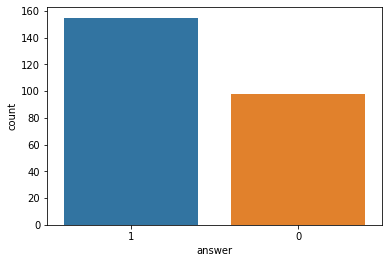

In [9]:
dst=pd.DataFrame()

dst['answer']=['1'] * len(os.listdir(Yes_dir)) + ['0'] * len(os.listdir(No_dir))

sns.countplot(x='answer', data=dst)

Text(0.5, 1.0, 'Yes')

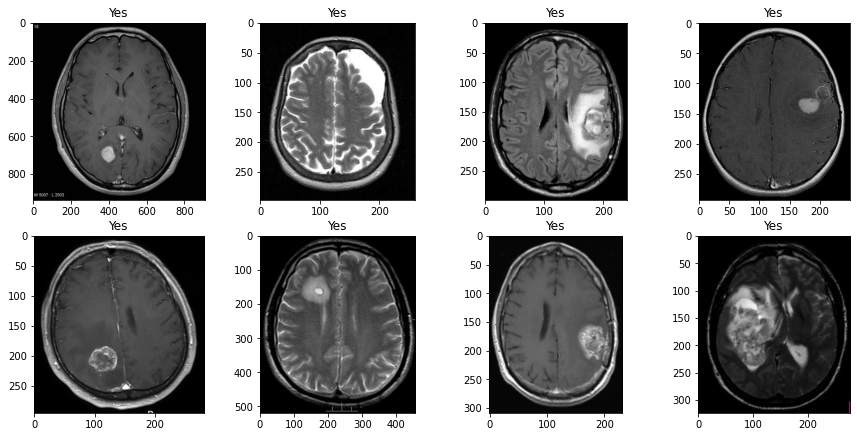

In [10]:
plt.figure(figsize=(15,15))

plt.subplot(4,4,1)
plt.imshow(load_img(os.path.join(Yes_dir, os.listdir(Yes_dir)[0])))
plt.title('Yes')

plt.subplot(4,4,2)
plt.imshow(load_img(os.path.join(Yes_dir, os.listdir(Yes_dir)[1])))
plt.title('Yes')

plt.subplot(4,4,3)
plt.imshow(load_img(os.path.join(Yes_dir, os.listdir(Yes_dir)[2])))
plt.title('Yes')

plt.subplot(4,4,4)
plt.imshow(load_img(os.path.join(Yes_dir, os.listdir(Yes_dir)[3])))
plt.title('Yes')

plt.subplot(4,4,5)
plt.imshow(load_img(os.path.join(Yes_dir, os.listdir(Yes_dir)[4])))
plt.title('Yes')

plt.subplot(4,4,6)
plt.imshow(load_img(os.path.join(Yes_dir, os.listdir(Yes_dir)[5])))
plt.title('Yes')

plt.subplot(4,4,7)
plt.imshow(load_img(os.path.join(Yes_dir, os.listdir(Yes_dir)[6])))
plt.title('Yes')

plt.subplot(4,4,8)
plt.imshow(load_img(os.path.join(Yes_dir, os.listdir(Yes_dir)[7])))
plt.title('Yes')

Text(0.5, 1.0, 'No')

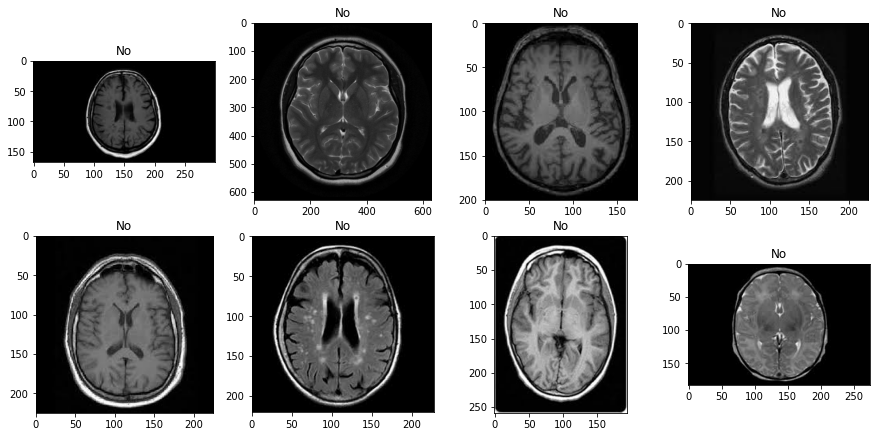

In [11]:
plt.figure(figsize=(15,15))

plt.subplot(4,4,1)
plt.imshow(load_img(os.path.join(No_dir, os.listdir(No_dir)[0])))
plt.title('No')

plt.subplot(4,4,2)
plt.imshow(load_img(os.path.join(No_dir, os.listdir(No_dir)[1])))
plt.title('No')

plt.subplot(4,4,3)
plt.imshow(load_img(os.path.join(No_dir, os.listdir(No_dir)[2])))
plt.title('No')

plt.subplot(4,4,4)
plt.imshow(load_img(os.path.join(No_dir, os.listdir(No_dir)[3])))
plt.title('No')

plt.subplot(4,4,5)
plt.imshow(load_img(os.path.join(No_dir, os.listdir(No_dir)[4])))
plt.title('No')

plt.subplot(4,4,6)
plt.imshow(load_img(os.path.join(No_dir, os.listdir(No_dir)[5])))
plt.title('No')

plt.subplot(4,4,7)
plt.imshow(load_img(os.path.join(No_dir, os.listdir(No_dir)[6])))
plt.title('No')

plt.subplot(4,4,8)
plt.imshow(load_img(os.path.join(No_dir, os.listdir(No_dir)[7])))
plt.title('No')


In [12]:
base_dir='/content/mydrive/MyDrive/Colab Notebooks 2/Brain Tumor Prediction/archive/brain_tumor_dataset'

datagen=ImageDataGenerator(rescale=1/255,
                            rotation_range=20,
                              horizontal_flip=True,
                               height_shift_range=0.1,
                                width_shift_range=0.1,
                                 shear_range=0.1,
                                  brightness_range=[0.3, 1.5],
                                   validation_split=0.2)

In [15]:
train_gen=datagen.flow_from_directory(base_dir,
                                     target_size=(224,224),
                                     class_mode='binary',
                                     subset='training')

val_gen=datagen.flow_from_directory(base_dir,
                                   target_size=(224,224),
                                   class_mode='binary',
                                   subset='validation')


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [16]:
from keras.models import *
from keras.layers import *
from keras.applications import VGG16

VGG = VGG16(input_shape = (224,224, 3), weights = 'imagenet', include_top = False)
   
VGG.trainable = False

model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])


history = model.fit(train_gen, epochs = 20, batch_size = 32, validation_data = val_gen)

58892288/58889256 [==============================] - 0s 0us/step
Epoch 1/20
7/7 [==============================] - 80s 10s/step - loss: 0.6874 - accuracy: 0.6691 - val_loss: 1.3700 - val_accuracy: 0.6600
Epoch 2/20
7/7 [==============================] - 5s 662ms/step - loss: 0.5049 - accuracy: 0.7917 - val_loss: 0.9846 - val_accuracy: 0.7600
Epoch 3/20
7/7 [==============================] - 5s 662ms/step - loss: 0.4216 - accuracy: 0.8392 - val_loss: 0.6094 - val_accuracy: 0.7400
Epoch 4/20
7/7 [==============================] - 5s 666ms/step - loss: 0.4265 - accuracy: 0.8387 - val_loss: 0.6003 - val_accuracy: 0.6800
Epoch 5/20
7/7 [==============================] - 5s 670ms/step - loss: 0.3623 - accuracy: 0.8516 - val_loss: 0.5609 - val_accuracy: 0.6400
Epoch 6/20
7/7 [==============================] - 5s 668ms/step - loss: 0.4279 - accuracy: 0.8017 - val_loss: 0.4479 - val_accuracy: 0.7800
Epoch 7/20
7/7 [==============================] - 5s 734ms/step - loss: 0.3800 - accuracy: 0.832

No handles with labels found to put in legend.
No handles with labels found to put in legend.


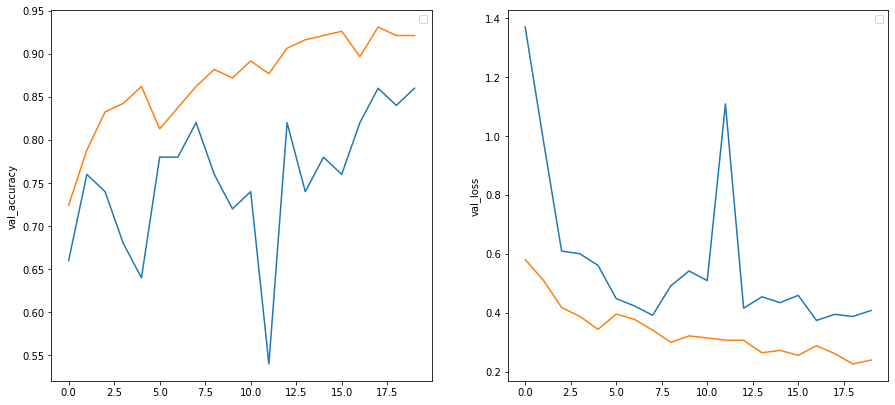

In [17]:
plt.figure(figsize=(15, 15))

plt.subplot(2,2, 1)
sns.lineplot(data = history.history, x = range(20), y = 'val_accuracy')
sns.lineplot(data = history.history, x = range(20), y = 'accuracy')
plt.legend()

plt.subplot(2,2, 2)
sns.lineplot(data = history.history, x = range(20), y = 'val_loss')
sns.lineplot(data = history.history, x = range(20), y = 'loss')
plt.legend()


In [18]:
from keras import optimizers
from keras import optimizers

VGG.trainable = True
set_trainable = False

for layer in VGG.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics= ['accuracy'] )

history = model.fit(train_gen, batch_size = 20, epochs = 30, validation_data = val_gen )

Epoch 1/30
7/7 [==============================] - 7s 795ms/step - loss: 0.2650 - accuracy: 0.9254 - val_loss: 0.3807 - val_accuracy: 0.8000
Epoch 2/30
7/7 [==============================] - 5s 662ms/step - loss: 0.2535 - accuracy: 0.9418 - val_loss: 0.4299 - val_accuracy: 0.8400
Epoch 3/30
7/7 [==============================] - 5s 660ms/step - loss: 0.2208 - accuracy: 0.9401 - val_loss: 0.3378 - val_accuracy: 0.8200
Epoch 4/30
7/7 [==============================] - 5s 678ms/step - loss: 0.2075 - accuracy: 0.9555 - val_loss: 0.4116 - val_accuracy: 0.8000
Epoch 5/30
7/7 [==============================] - 5s 738ms/step - loss: 0.2209 - accuracy: 0.9388 - val_loss: 0.2596 - val_accuracy: 0.9200
Epoch 6/30
7/7 [==============================] - 5s 675ms/step - loss: 0.2071 - accuracy: 0.9591 - val_loss: 0.3366 - val_accuracy: 0.8400
Epoch 7/30
7/7 [==============================] - 5s 688ms/step - loss: 0.1799 - accuracy: 0.9640 - val_loss: 0.3094 - val_accuracy: 0.8800
Epoch 8/30
7/7 [====

No handles with labels found to put in legend.
No handles with labels found to put in legend.


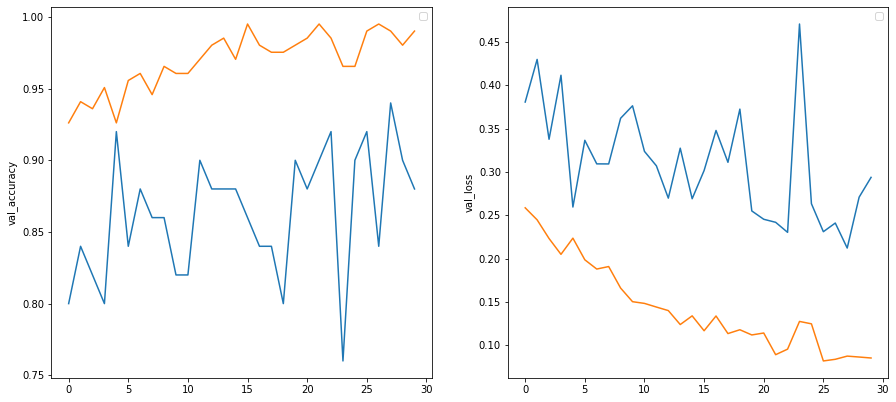

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(2,2, 3)
sns.lineplot(data = history.history, x = range(30), y = 'val_accuracy')
sns.lineplot(data = history.history, x = range(30), y = 'accuracy')
plt.legend()

plt.subplot(2,2, 4)
sns.lineplot(data = history.history, x = range(30), y = 'val_loss')
sns.lineplot(data = history.history, x = range(30), y = 'loss')
plt.legend()

In [21]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df['epoch_id'] = [i for i in range (1,len(hist_df)+1)]
hist_df=hist_df.reindex(columns= ['epoch_id', 'loss', 'accuracy','val_loss','val_accuracy'])
print(hist_df)

    epoch_id      loss  accuracy  val_loss  val_accuracy
0          1  0.258703  0.926108  0.380682          0.80
1          2  0.244838  0.940887  0.429861          0.84
2          3  0.223303  0.935961  0.337777          0.82
3          4  0.205061  0.950739  0.411601          0.80
4          5  0.223710  0.926108  0.259615          0.92
5          6  0.198745  0.955665  0.336567          0.84
6          7  0.188085  0.960591  0.309395          0.88
7          8  0.190969  0.945813  0.309315          0.86
8          9  0.166159  0.965517  0.361990          0.86
9         10  0.150443  0.960591  0.376377          0.82
10        11  0.148472  0.960591  0.323798          0.82
11        12  0.144264  0.970443  0.307145          0.90
12        13  0.140174  0.980296  0.269865          0.88
13        14  0.124078  0.985222  0.327485          0.88
14        15  0.134094  0.970443  0.269164          0.88
15        16  0.116922  0.995074  0.301708          0.86
16        17  0.133947  0.98029

In [23]:
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
hist_df.to_excel(writer)
# save the excel
writer.save()

In [24]:
model.save('/content/mydrive/MyDrive/Colab Notebooks 2/Brain Tumor Prediction/model.vgg16.h5')